In [1]:
#import packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt; plt.rcdefaults()
from pylab import rcParams
import seaborn as sb
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
#define figure sizing of graphs
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
sb.set_style('whitegrid')

In [3]:
#upload dataset from user file, where python is stored
address = 'vgsales.csv'
vgsales = pd.read_csv(address)
vgsales.columns = ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'naSales', 'euSales', 'jpSales', 
                   'otherSales', 'globalSales']
vgsales.head(20)

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
vgsales.info()
# categorical variables: rank, name, platform, year, genre, publisher
#categorical count: 6
# numerical variables: naSales, euSales, jpSales, otherSales, globalSales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         16598 non-null  int64  
 1   name         16598 non-null  object 
 2   platform     16598 non-null  object 
 3   year         16327 non-null  float64
 4   genre        16598 non-null  object 
 5   publisher    16540 non-null  object 
 6   naSales      16598 non-null  float64
 7   euSales      16598 non-null  float64
 8   jpSales      16598 non-null  float64
 9   otherSales   16598 non-null  float64
 10  globalSales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#check the numerical attributes for 0 value
numMissing = (vgsales[['year', 'naSales', 'euSales', 'jpSales', 
                   'otherSales', 'globalSales']] == 0).sum()
print(numMissing)

year               0
naSales         4499
euSales         5730
jpSales        10455
otherSales      6477
globalSales        0
dtype: int64


In [6]:
#clean data to the top 3000 video game titles from 2006 to 2016
top3000since2006 = vgsales[vgsales['year'] >= 2006.0][:3000]
top3000since2006

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
5399,5401,MX vs. ATV Untamed,Wii,2008.0,Racing,THQ,0.29,0.03,0.00,0.03,0.34
5401,5403,Football Manager Handheld 2008,PSP,2007.0,Sports,Sega,0.00,0.34,0.00,0.00,0.34
5403,5405,Harry Potter and the Deathly Hallows - Part 2,PS3,2011.0,Action,Electronic Arts,0.14,0.15,0.00,0.05,0.34
5404,5406,MVP 06 NCAA Baseball,XB,2006.0,Sports,Electronic Arts,0.25,0.07,0.00,0.01,0.34


In [7]:
#reindex the values of rank from original ranking, to 1-3000
#create list from 1-3000, remove rank column, finally insert rank list as new rank column
rank = list(range(1, len(top3000since2006['name']) + 1))
index = list(range(0, len(top3000since2006['name'])))
top3000since2006 = top3000since2006.drop(['rank'], axis = 1)
#check that column "rank" was removed
top3000since2006.head(2)

,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [8]:
# create a list to be used as index, and to be used as rank values
top3000since2006.insert(0, "index", index, False)
#check that new column "rank" was inserted
top3000since2006 = top3000since2006.set_index("index")
top3000since2006.insert(0, "rank", rank, False)
top3000since2006.head(2)

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
index,,,,,,,,,,,
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [9]:
#change column types to categorical
top3000since2006['year'] = top3000since2006['year'].astype('category')
top3000since2006['rank'] = top3000since2006['rank'].astype('category')
top3000since2006['name'] = top3000since2006['name'].astype('category')
top3000since2006['platform'] = top3000since2006['platform'].astype('category')
top3000since2006['genre'] = top3000since2006['genre'].astype('category')
top3000since2006['publisher'] = top3000since2006['publisher'].astype('category')

In [10]:
#describe new dataframe numerical values
top3000since2006.describe()

,naSales,euSales,jpSales,otherSales,globalSales
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.669063,0.450100,0.125440,0.165777,1.410423
std,1.314769,0.946483,0.433573,0.314661,2.665382
min,0.000000,0.000000,0.000000,0.000000,0.340000
25%,0.220000,0.090000,0.000000,0.040000,0.490000
50%,0.370000,0.230000,0.000000,0.080000,0.750000
75%,0.670000,0.470000,0.060000,0.170000,1.380000
max,41.490000,29.020000,6.500000,8.460000,82.740000


In [11]:
#check that data types have changed
top3000since2006.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rank         3000 non-null   category
 1   name         3000 non-null   category
 2   platform     3000 non-null   category
 3   year         3000 non-null   category
 4   genre        3000 non-null   category
 5   publisher    2999 non-null   category
 6   naSales      3000 non-null   float64 
 7   euSales      3000 non-null   float64 
 8   jpSales      3000 non-null   float64 
 9   otherSales   3000 non-null   float64 
 10  globalSales  3000 non-null   float64 
dtypes: category(6), float64(5)
memory usage: 369.3 KB


In [12]:
#create a correlation matrix of numerical data 
df = top3000since2006[['naSales', 'euSales', 'jpSales', 'otherSales', 'globalSales']]
df.corr()

,naSales,euSales,jpSales,otherSales,globalSales
naSales,1.000000,0.850208,0.405066,0.788938,0.954205
euSales,0.850208,1.000000,0.426528,0.863411,0.945773
jpSales,0.405066,0.426528,1.000000,0.359558,0.556400
otherSales,0.788938,0.863411,0.359558,1.000000,0.872255
globalSales,0.954205,0.945773,0.556400,0.872255,1.000000


In [13]:
#find means of sales 
genre_group = top3000since2006.groupby(top3000since2006['genre'])
genre_group.mean()

,naSales,euSales,jpSales,otherSales,globalSales
genre,,,,,
Action,0.587810,0.416530,0.076504,0.159050,1.239960
Adventure,0.450805,0.311494,0.072069,0.100230,0.934713
Fighting,0.576127,0.275493,0.129296,0.147183,1.128239
Misc,0.701601,0.401450,0.128792,0.154773,1.386677
Platform,0.874000,0.549714,0.241071,0.192929,1.857714
Puzzle,0.497885,0.418846,0.186923,0.101731,1.207115
Racing,0.580789,0.538526,0.065000,0.189895,1.373842
Role-Playing,0.611079,0.358237,0.459856,0.133345,1.562698
Shooter,0.992274,0.647843,0.049271,0.233003,1.922420


In [14]:
#find how many variables fall into each genre category
top3000since2006.groupby(['genre']).size()

genre
Action          758
Adventure        87
Fighting        142
Misc            331
Platform        140
Puzzle           52
Racing          190
Role-Playing    278
Shooter         343
Simulation      160
Sports          460
Strategy         59
dtype: int64

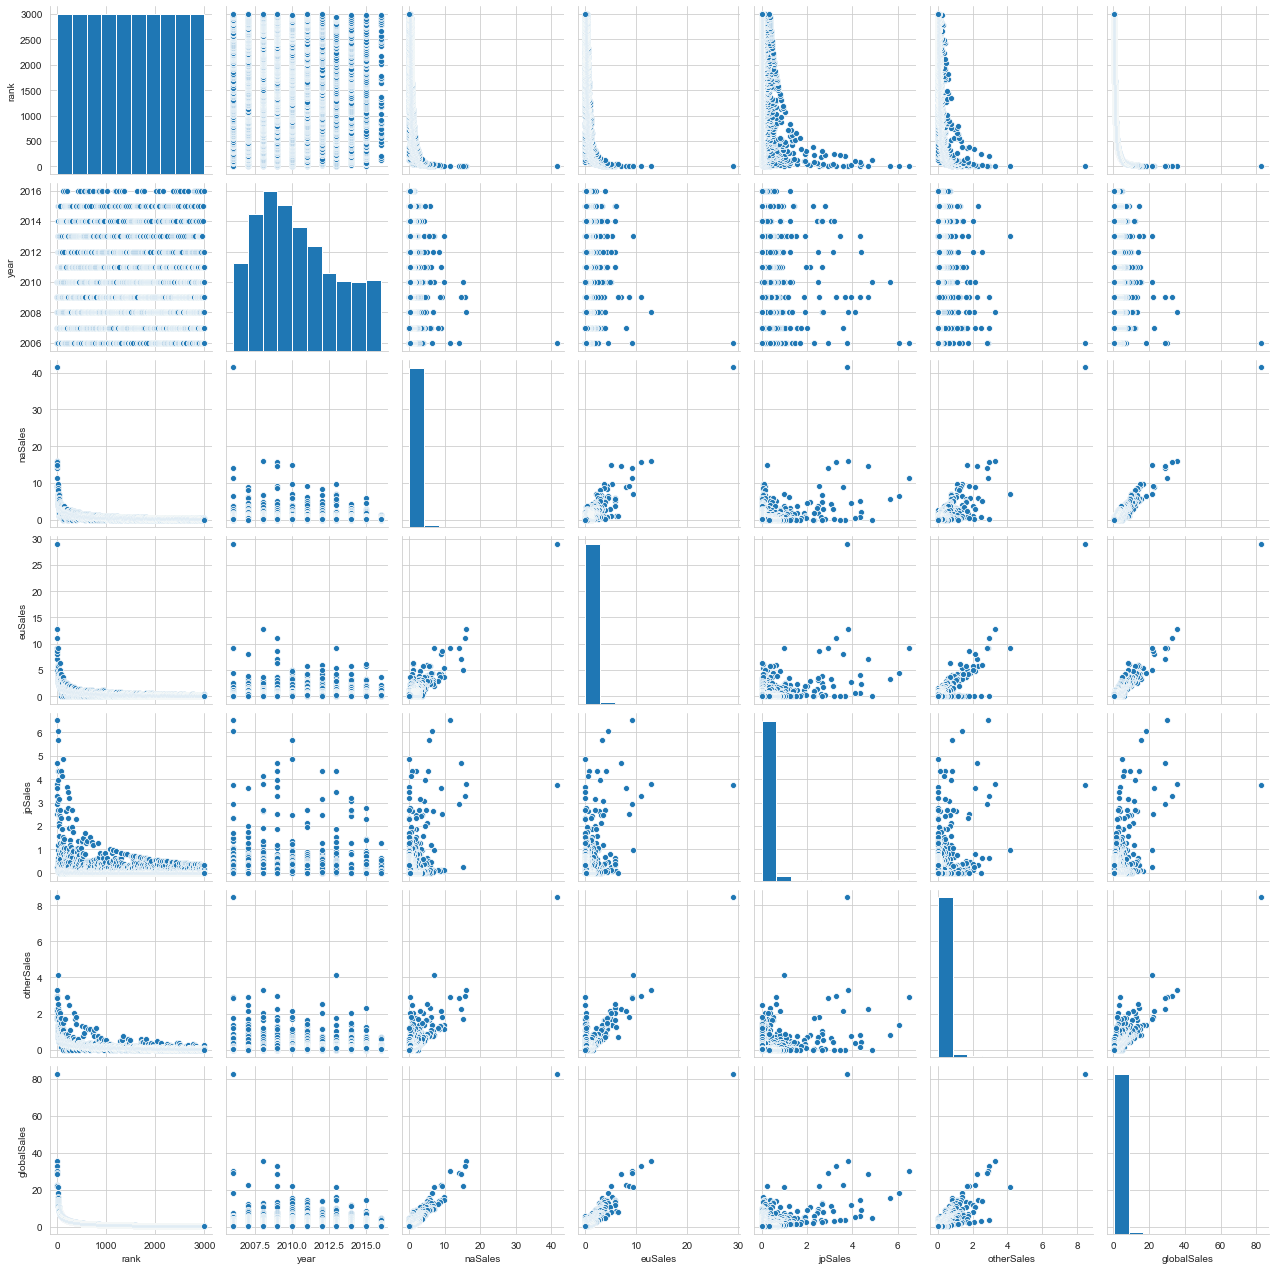

In [15]:
#create pairplot of top500since2006
sb.pairplot(top3000since2006)
plt.show()

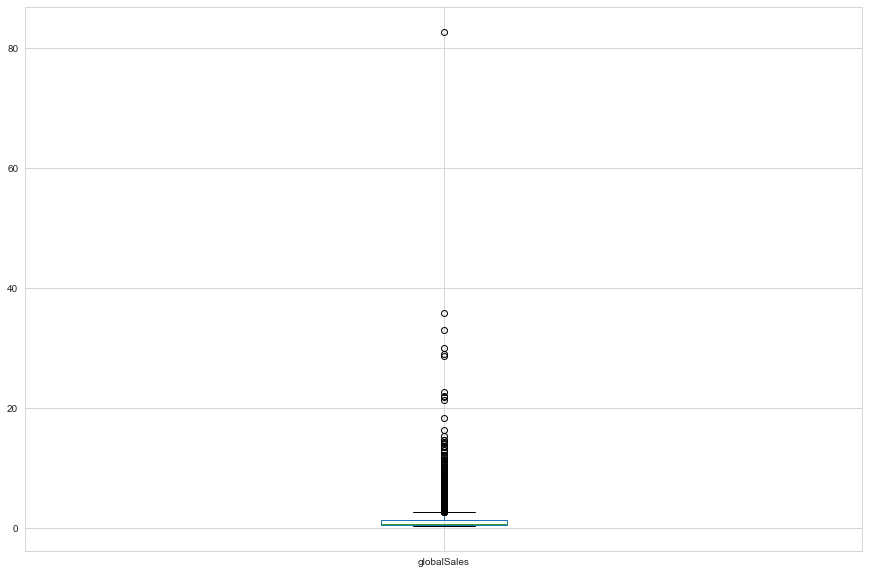

In [16]:
# highlight the skewedness of global Sales (our classifier)
fig = top3000since2006.boxplot(column='globalSales')
fig.set_xticklabels(fig.get_xticklabels())
plt.show()

In [17]:
# identify the IQR and upper and lower bound of global sales data 
globalSales = top3000since2006['globalSales'].tolist()
globalSales.sort()
Q1 = np.median(globalSales[:len(globalSales) // 2])
Q3 = np.median(globalSales[len(globalSales) // 2:])
IQR = Q3 - Q1
print(IQR)
lowerBound = Q1 - (IQR * 1.5)
upperBound = Q3 + (IQR * 1.5)

0.8899999999999999


In [18]:
# reset index for new standardized data set
top3000since2006_standardized = top3000since2006[~((top3000since2006['globalSales'] < lowerBound) |(top3000since2006['globalSales'] > upperBound))]
top3000since2006_standardized.reset_index(inplace = True, drop = True)
top3000since2006_standardized.head()

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,305,Call of Duty 3,X360,2006.0,Shooter,Activision,1.49,0.93,0.02,0.27,2.71
1,306,Mortal Kombat X,PS4,2015.0,Fighting,Warner Bros. Interactive Entertainment,1.47,0.76,0.00,0.47,2.70
2,307,Madden NFL 12,X360,2011.0,Sports,Electronic Arts,2.42,0.11,0.00,0.16,2.69
3,308,LEGO Star Wars II: The Original Trilogy,PS2,2006.0,Action,LucasArts,1.85,0.64,0.01,0.19,2.69
4,309,Madden NFL 11,X360,2010.0,Sports,Electronic Arts,2.38,0.12,0.00,0.18,2.69


C:\Users\jgalv\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


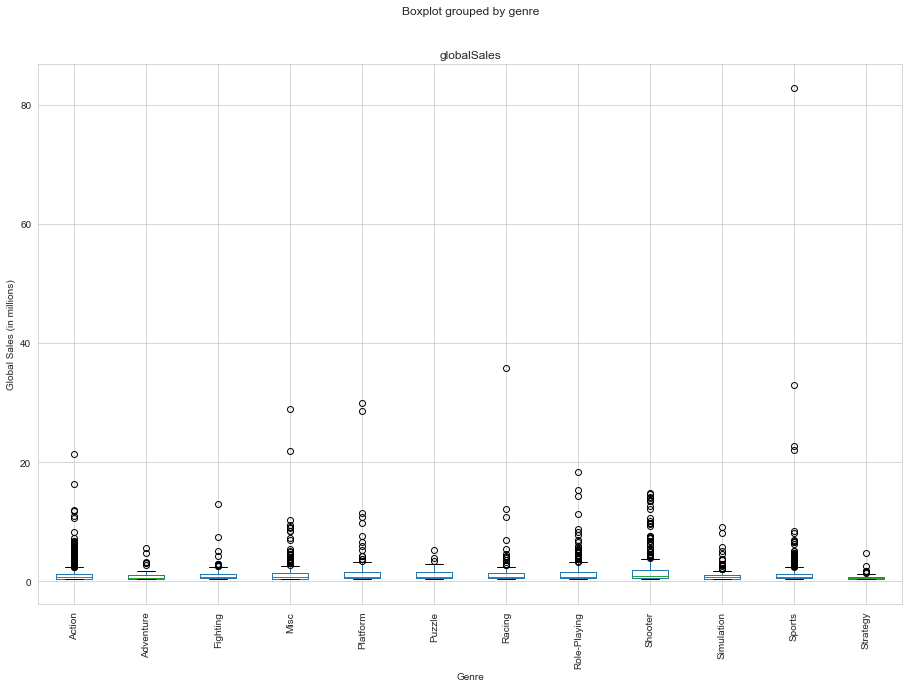

In [19]:
#create boxplots of total global sales per genre
fig = top3000since2006.boxplot(column='globalSales', by = "genre")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Genre')
plt.show()

C:\Users\jgalv\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


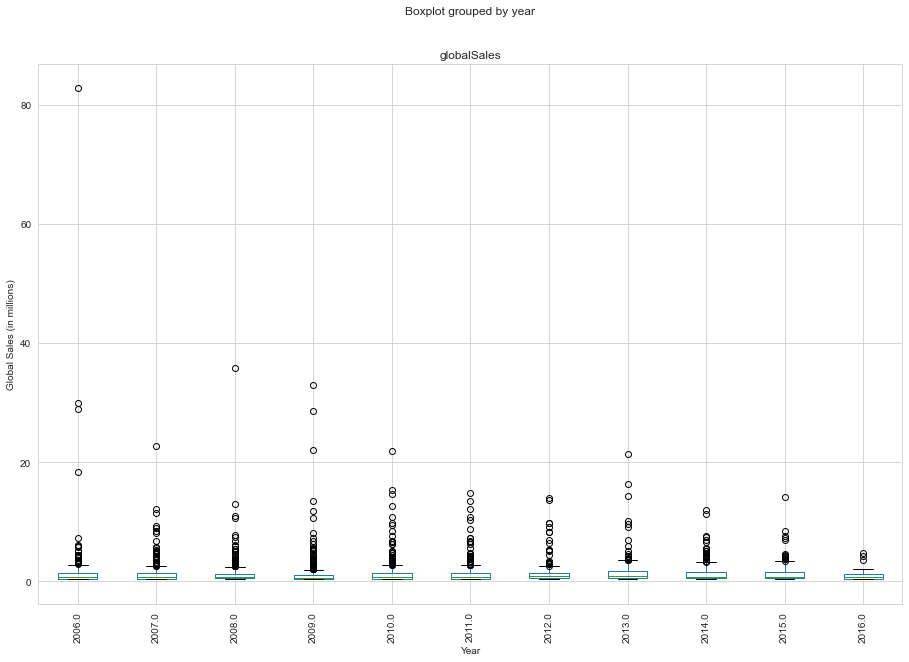

In [20]:
#create boxplots of global sales by year
fig = top3000since2006.boxplot(column='globalSales', by = "year")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Year')
plt.show()

C:\Users\jgalv\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


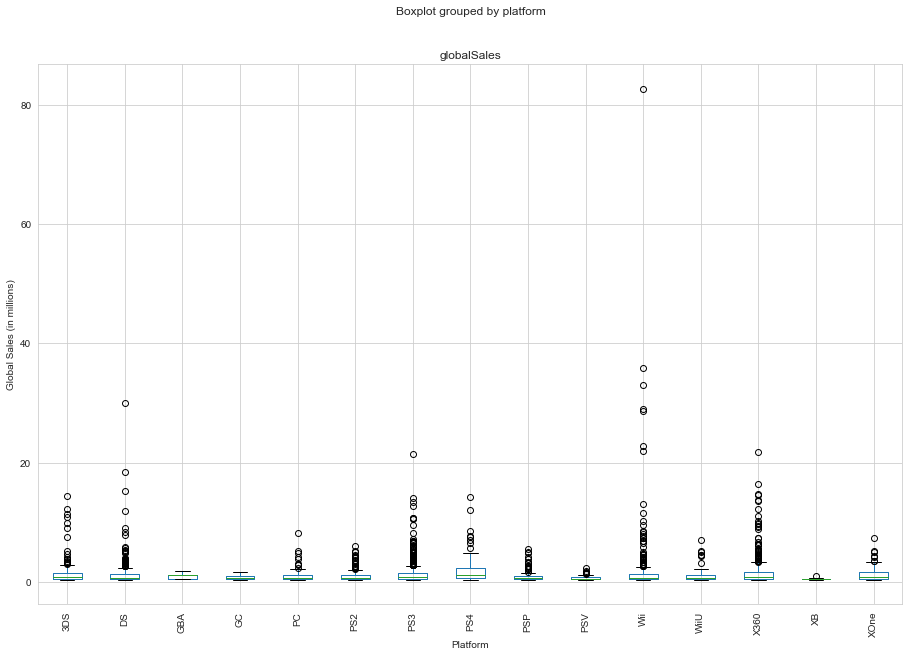

In [21]:
#create boxplots of global sales by platform
fig = top3000since2006.boxplot(column='globalSales', by = "platform")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Platform')
plt.show()

C:\Users\jgalv\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


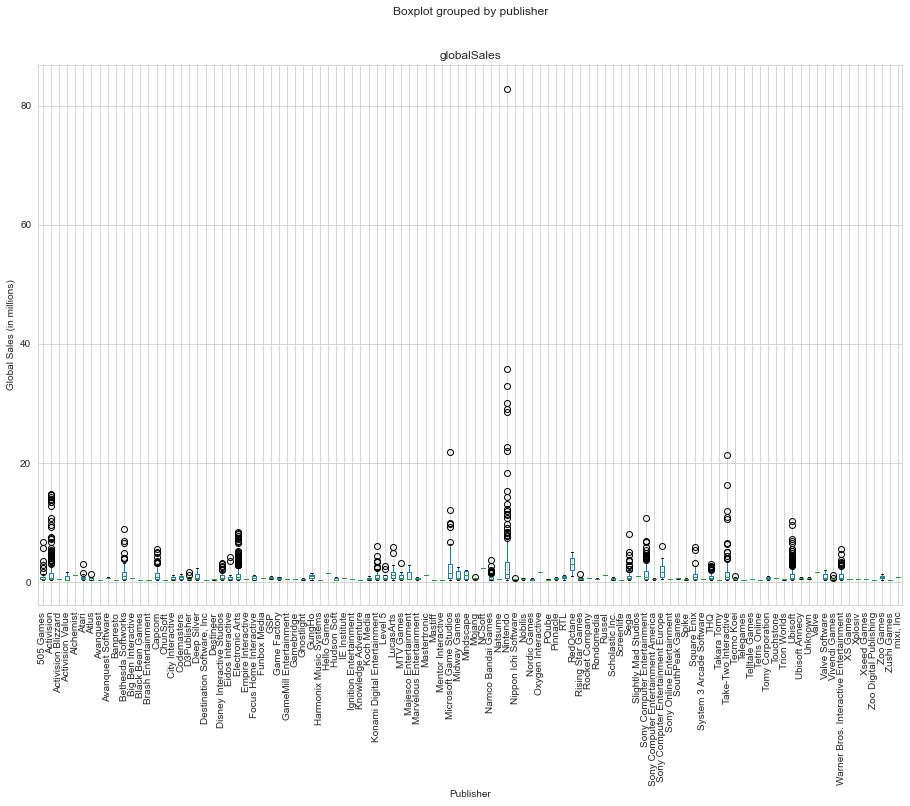

In [22]:
#create boxplot of global sales by publisher
fig = top3000since2006.boxplot(column='globalSales', by = "publisher")
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Publisher')
plt.show()

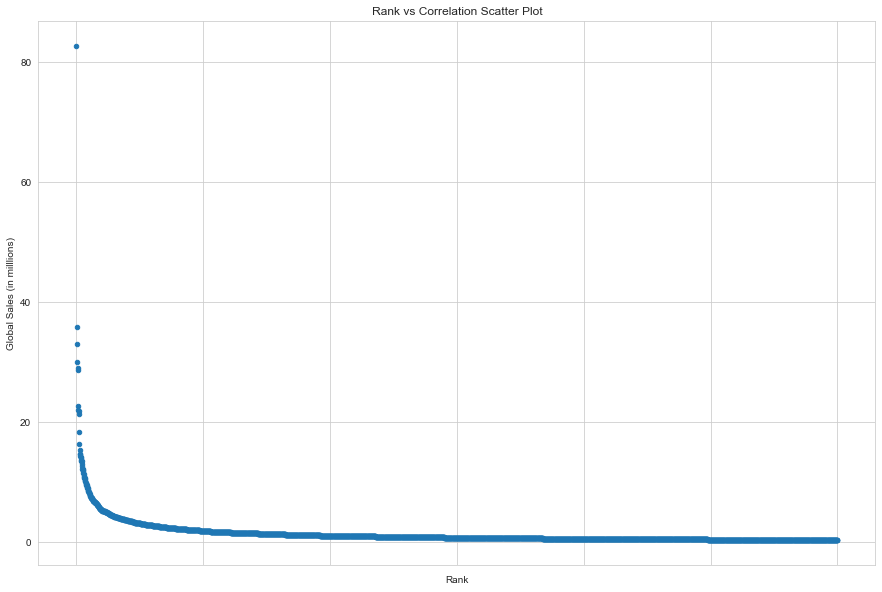

In [23]:
#create scatter plot of global sales by rank
fig = top3000since2006.plot(kind = "scatter", x = 'rank', y = 'globalSales')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.xlabel('Rank')
plt.ylabel('Global Sales (in milllions)')
plt.title('Rank vs Correlation Scatter Plot')
plt.show()

In [24]:
#create 4 different groupings based on globalSales sum  
df_grp = top3000since2006.groupby(['publisher', 'platform', 'genre', 'year'])['globalSales'].sum().reset_index()

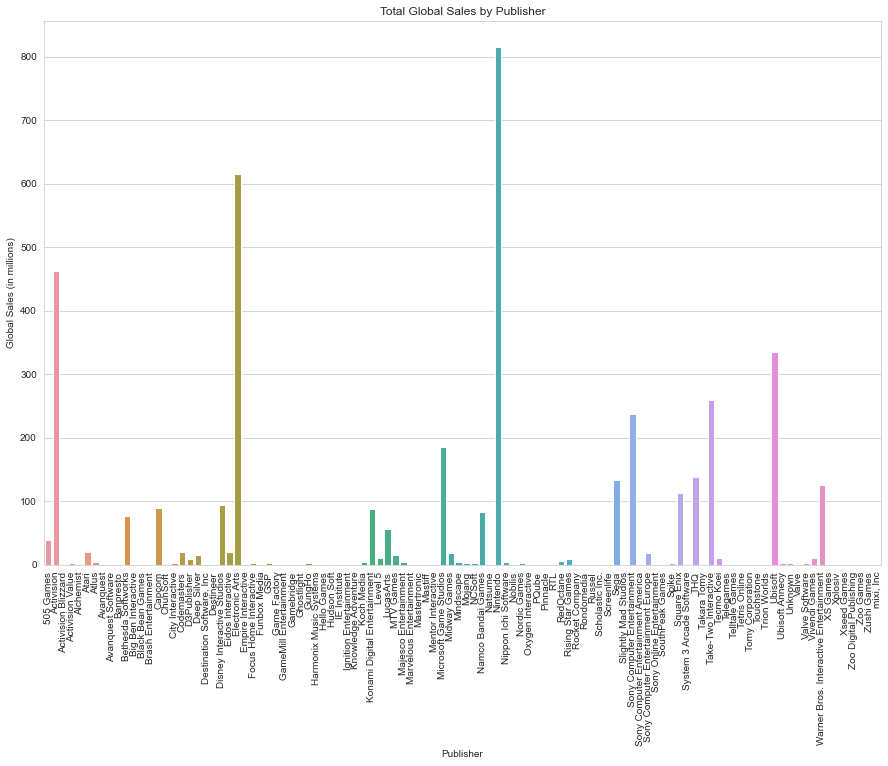

In [25]:
#create bar graph of total global sales per publisher
ax = sb.barplot(x='publisher', y='globalSales', data=df_grp, ci=None, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Publisher')
plt.title('Total Global Sales by Publisher')
plt.show()

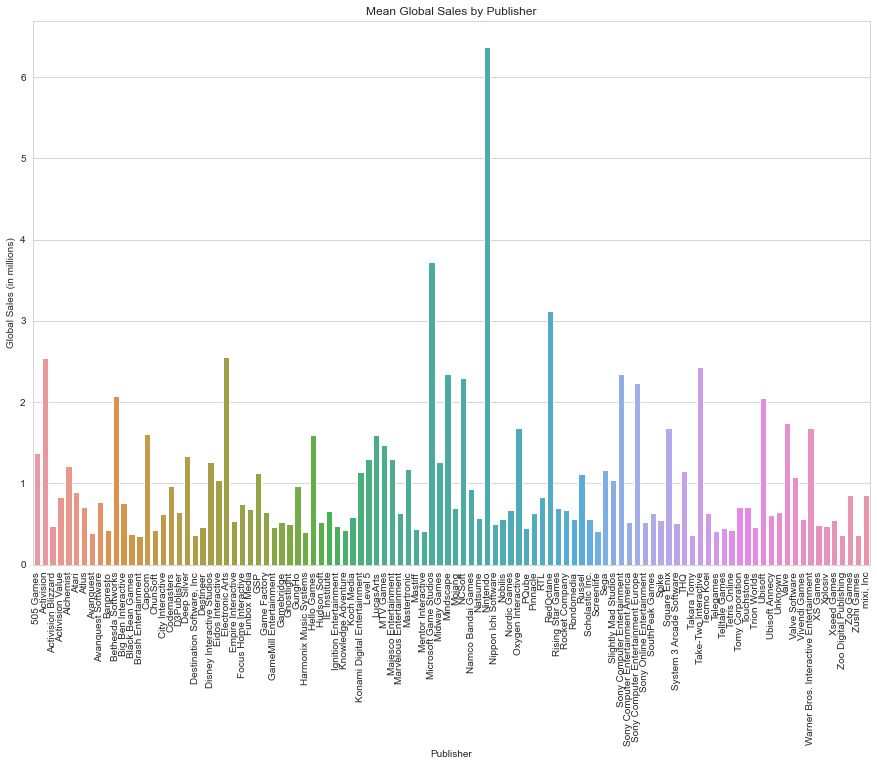

In [26]:
#create bar graph of mean global sales per publisher
ax = sb.barplot(x='publisher', y='globalSales', data=df_grp, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Publisher')
plt.title('Mean Global Sales by Publisher')
plt.show()

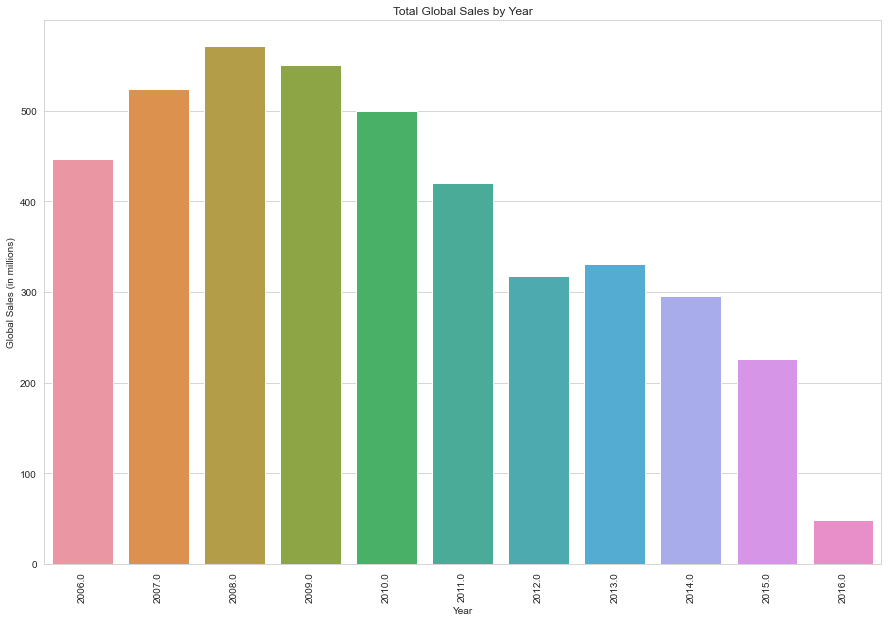

In [27]:
#create bar graph of total global sales per year
ax = sb.barplot(x='year', y='globalSales', data=df_grp, ci=None, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Year')
plt.title('Total Global Sales by Year')
plt.show()

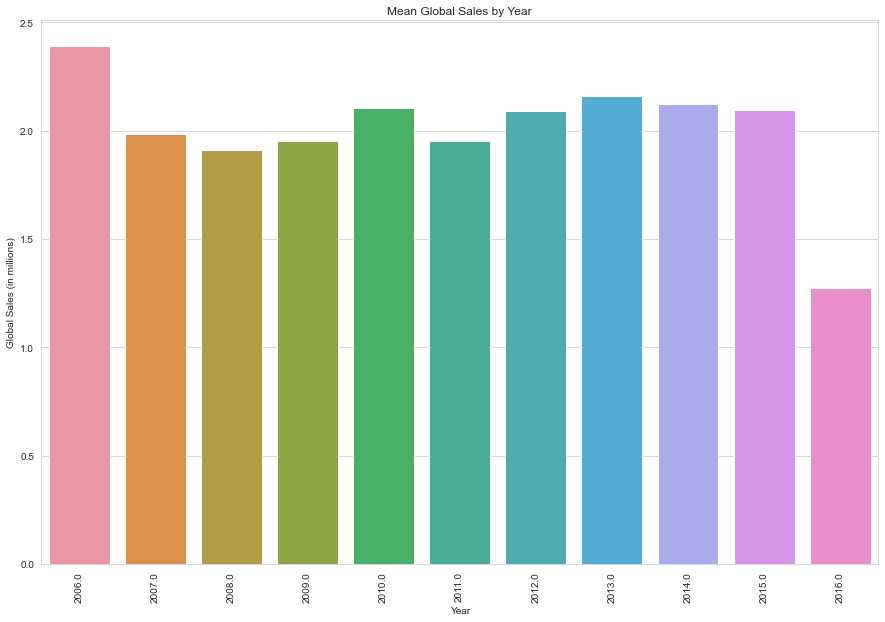

In [28]:
#create bar graph of mean global sales per year
ax = sb.barplot(x='year', y='globalSales', data=df_grp, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Year')
plt.title('Mean Global Sales by Year')
plt.show()

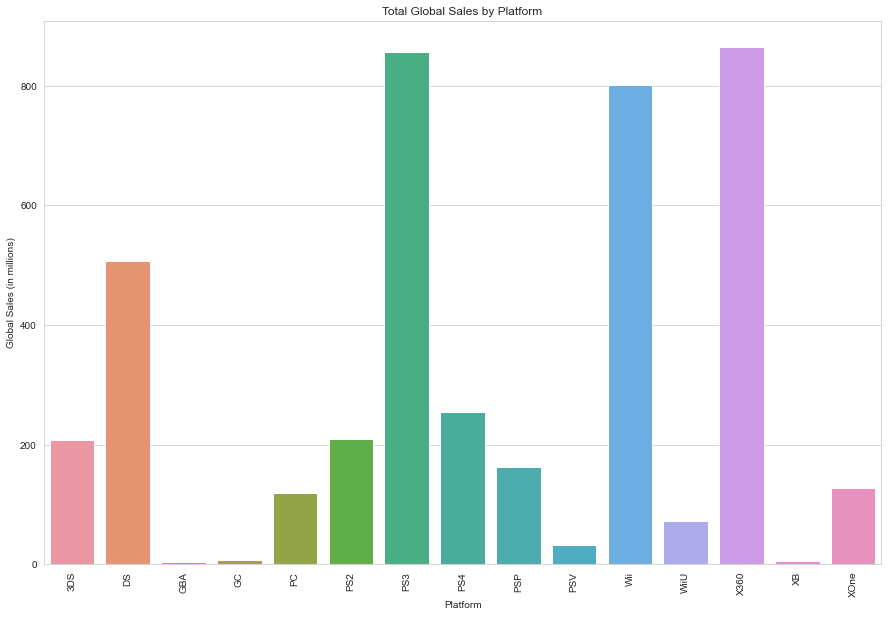

In [29]:
#create bar graph of total global sales per platform
ax = sb.barplot(x='platform', y='globalSales', data=df_grp, ci=None, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Platform')
plt.title('Total Global Sales by Platform')
plt.show()

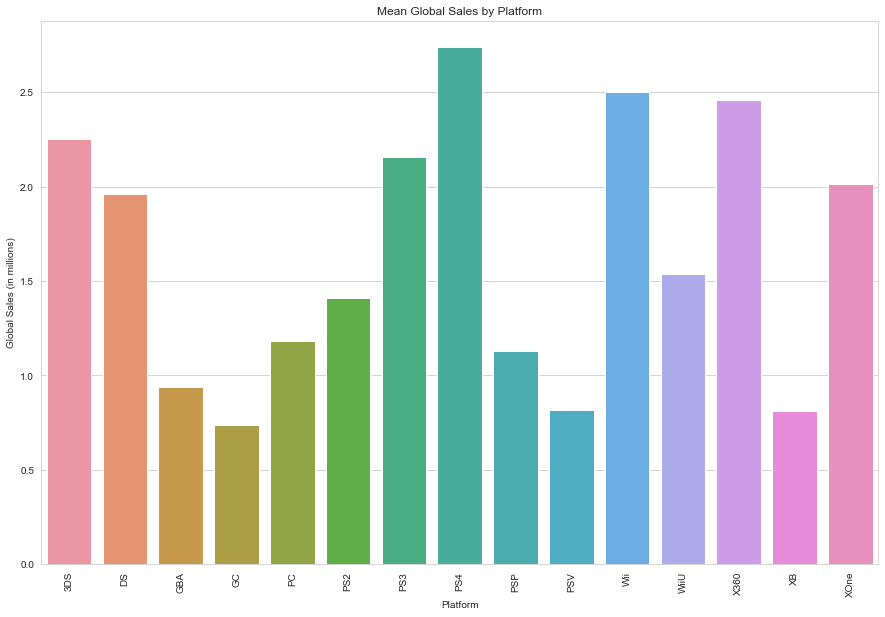

In [30]:
#create bar graph of mean global sales per platform
ax = sb.barplot(x='platform', y='globalSales', data=df_grp, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Platform')
plt.title('Mean Global Sales by Platform')
plt.show()

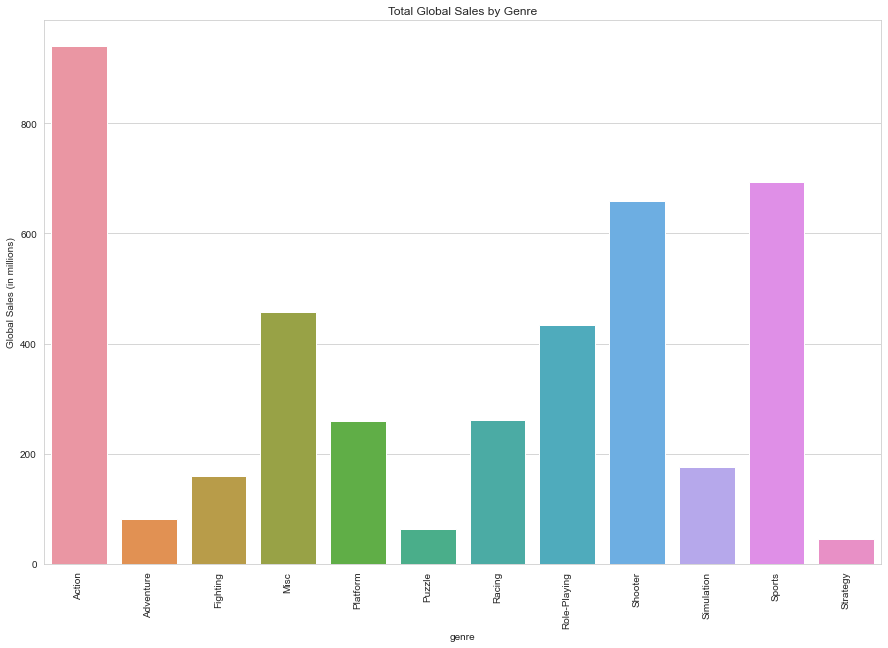

In [31]:
#create bar graph of total global sales per genre
ax = sb.barplot(x='genre', y='globalSales', data=df_grp, ci=None, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('genre')
plt.title('Total Global Sales by Genre')
plt.show()

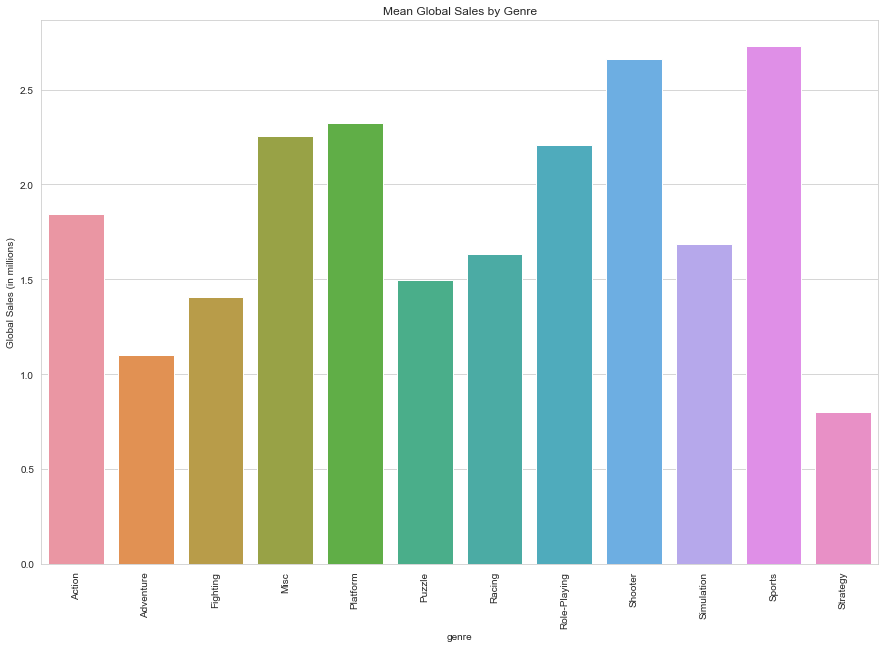

In [32]:
#create bar graph of mean global sales per genre
ax = sb.barplot(x='genre', y='globalSales', data=df_grp, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.ylabel('Global Sales (in millions)')
plt.xlabel('genre')
plt.title('Mean Global Sales by Genre')
plt.show()

In [33]:
# change sales values from decimal to actual millions value
top3000since2006_standardized['globalSales'] = top3000since2006_standardized['globalSales'] * 1000000
top3000since2006_standardized['naSales'] = top3000since2006_standardized['naSales'] * 1000000
top3000since2006_standardized['euSales'] = top3000since2006_standardized['euSales'] * 1000000
top3000since2006_standardized['jpSales'] = top3000since2006_standardized['jpSales'] * 1000000
top3000since2006_standardized['otherSales'] = top3000since2006_standardized['otherSales'] * 1000000
top3000since2006_standardized = top3000since2006_standardized.astype({"globalSales": int, "naSales": int, "euSales": int, 
    "jpSales": int, "otherSales": int})
top3000since2006_standardized.head(2)

<ipython-input-33-9a006df3c539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3000since2006_standardized['globalSales'] = top3000since2006_standardized['globalSales'] * 1000000
<ipython-input-33-9a006df3c539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3000since2006_standardized['naSales'] = top3000since2006_standardized['naSales'] * 1000000
<ipython-input-33-9a006df3c539>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales
0,305,Call of Duty 3,X360,2006.0,Shooter,Activision,1490000,930000,20000,270000,2710000
1,306,Mortal Kombat X,PS4,2015.0,Fighting,Warner Bros. Interactive Entertainment,1470000,760000,0,470000,2700000


In [34]:
# create bin limits for classification of global sales column
globalSalesRange = top3000since2006_standardized['globalSales'].max() - top3000since2006_standardized['globalSales'].min()
binSize = globalSalesRange // 3
print(binSize)
lowBin = [top3000since2006_standardized['globalSales'].min(), top3000since2006_standardized['globalSales'].min() + binSize]
midBin = [lowBin[1] + 1, lowBin[1] + 1 + binSize]
highBin = [midBin[1] + 1, top3000since2006_standardized['globalSales'].max()]
print(lowBin)
print(midBin)
print(highBin)

790000
[340000, 1130000]
[1130001, 1920001]
[1920002, 2710000]


In [35]:
# create bins for global sales column 
binnedSales = [ 2 if (top3000since2006_standardized['globalSales'][x] >= highBin[0] and 
    top3000since2006_standardized['globalSales'][x] <= highBin[1]) else 1 if (top3000since2006_standardized['globalSales'][x] 
    >= midBin[0] and top3000since2006_standardized['globalSales'][x] <= midBin[1]) else 0 
    for x in range(0, len(top3000since2006_standardized['name'])) ]
#print(len(binnedSales))
top3000since2006_standardized.insert(11, "class", binnedSales, True)
top3000since2006_standardized.head(2)

,rank,name,platform,year,genre,publisher,naSales,euSales,jpSales,otherSales,globalSales,class
0,305,Call of Duty 3,X360,2006.0,Shooter,Activision,1490000,930000,20000,270000,2710000,2
1,306,Mortal Kombat X,PS4,2015.0,Fighting,Warner Bros. Interactive Entertainment,1470000,760000,0,470000,2700000,2


In [36]:
# split data to featues and class 
X = top3000since2006_standardized.values[:, 2:5]
y = top3000since2006_standardized.values[:, 11]

In [37]:
# split data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)